# Data Cleaning

This notebook cleans and prepares our CLV data for feature engineering:

+ validating data types

+ resolving time-based features into numeric form

+ handling imbalanced and outliers

+ ensuring no data leakage


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../data/processed/clv_table_data.parquet")

__One major step we have to do is to convert the days columns (`recency` and `customer_age`) taht were in timedelta to integer__

__This is because pandas automatically converts them to nanoseconds if not handled__

__We'll convert it to days, keeping it as meaningful float datatype to represent hour-level precision__

In [2]:
df["purchase_recency"] = pd.to_timedelta(df["recency"], unit="ns").dt.total_seconds() / 86400
df["customer_age"] = pd.to_timedelta(df["customer_age"], unit="ns").dt.total_seconds() / 86400

df.drop(columns=["recency"], inplace=True)

We will sort the dataframe by the customer's last purchase date since the data is based off of purchase time and different customers' purchase patterns may change over time and seasons. e.g transactions during summer may be different from those during the December holidays

In [3]:
df = df.sort_values(by="last_purchase_date").reset_index(drop=True)
df

,customer_id,transaction_count,promo_code_used,quantity,total_spent,avg_order_value,first_purchase_date,last_purchase_date,customer_age,payment_method_count,future_spend,purchase_recency
0,21644,1,1,4,982790.0,9.827900e+05,2021-01-01 01:14:13.595013,2021-01-01 01:14:13.595013,364.948454,1,0.0,364.948454
1,73192,1,2,2,1242784.0,6.213920e+05,2021-01-01 09:21:35.642441,2021-01-01 09:21:35.642441,364.610004,1,0.0,364.610004
2,9779,1,0,1,68735.0,6.873500e+04,2021-01-01 16:04:27.746221,2021-01-01 16:04:27.746221,364.330234,1,0.0,364.330234
3,98867,1,0,1,250516.0,2.505160e+05,2021-01-02 01:37:22.173290,2021-01-02 01:37:22.173290,363.932382,1,0.0,363.932382
4,48935,1,0,2,588048.0,2.940240e+05,2021-01-02 09:29:22.418880,2021-01-02 09:29:22.418880,363.604602,1,0.0,363.604602
...,...,...,...,...,...,...,...,...,...,...,...,...
36081,9997,39,19,116,118890224.0,1.628633e+06,2021-01-05 16:20:48.543887,2021-12-31 23:53:34.543887,360.318883,3,8410264.0,0.004461
36082,30112,17,7,43,34991785.0,1.060357e+06,2021-09-20 23:06:53.574831,2021-12-31 23:54:08.574831,102.036880,3,16757213.0,0.004067
36083,7386,118,37,239,226852797.0,1.246444e+06,2021-01-02 21:04:42.223960,2021-12-31 23:54:36.223960,363.121734,5,31335757.0,0.003747
36084,56269,20,5,34,8430321.0,3.831964e+05,2021-08-16 01:24:11.607339,2021-12-31 23:56:22.607339,137.941532,4,12760145.0,0.002516


__Moving `total_spent` next to `future_spend` just to give that sense of comparison for each customer__

In [4]:
col = df.pop("total_spent")
df.insert(10, "total_spent", col)

col = df.pop("purchase_recency")
df.insert(7, "purchase_recency", col)


In [5]:
df.head()

,customer_id,transaction_count,promo_code_used,quantity,avg_order_value,first_purchase_date,last_purchase_date,purchase_recency,customer_age,payment_method_count,future_spend,total_spent
0,21644,1,1,4,982790.0,2021-01-01 01:14:13.595013,2021-01-01 01:14:13.595013,364.948454,364.948454,1,0.0,982790.0
1,73192,1,2,2,621392.0,2021-01-01 09:21:35.642441,2021-01-01 09:21:35.642441,364.610004,364.610004,1,0.0,1242784.0
2,9779,1,0,1,68735.0,2021-01-01 16:04:27.746221,2021-01-01 16:04:27.746221,364.330234,364.330234,1,0.0,68735.0
3,98867,1,0,1,250516.0,2021-01-02 01:37:22.173290,2021-01-02 01:37:22.173290,363.932382,363.932382,1,0.0,250516.0
4,48935,1,0,2,294024.0,2021-01-02 09:29:22.418880,2021-01-02 09:29:22.418880,363.604602,363.604602,1,0.0,588048.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36086 entries, 0 to 36085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           36086 non-null  int64         
 1   transaction_count     36086 non-null  int64         
 2   promo_code_used       36086 non-null  int64         
 3   quantity              36086 non-null  int64         
 4   avg_order_value       36086 non-null  float64       
 5   first_purchase_date   36086 non-null  datetime64[ns]
 6   last_purchase_date    36086 non-null  datetime64[ns]
 7   purchase_recency      36086 non-null  float64       
 8   customer_age          36086 non-null  float64       
 9   payment_method_count  36086 non-null  int64         
 10  future_spend          36086 non-null  float64       
 11  total_spent           36086 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(5)
memory usage: 3.3 MB


__We'll start by cleaning up how purchase date is shown__

In [7]:

df["first_purchase_date"] = pd.to_datetime(df["first_purchase_date"].dt.strftime("%Y-%m-%d %H:%M"))
df["last_purchase_date"] = pd.to_datetime(df["last_purchase_date"].dt.strftime("%Y-%m-%d %H:%M"))


__`customer_age` can be misleading so we'll rename it to `customer_tenure` to represent how long since that customer first purchased from us (from the observation window)__

__We'll also rename `promo_code_used`. It's easy to think this could be a categorical feature meanwhile it's not__

In [8]:
df.rename(columns={"customer_age": "customer_tenure"}, inplace=True)
df.rename(columns={"promo_code_used": "promo_usage_count"}, inplace=True)

__Now it'a just formatted to the hour__

In [9]:
df[["first_purchase_date", "last_purchase_date"]]

,first_purchase_date,last_purchase_date
0,2021-01-01 01:14:00,2021-01-01 01:14:00
1,2021-01-01 09:21:00,2021-01-01 09:21:00
2,2021-01-01 16:04:00,2021-01-01 16:04:00
3,2021-01-02 01:37:00,2021-01-02 01:37:00
4,2021-01-02 09:29:00,2021-01-02 09:29:00
...,...,...
36081,2021-01-05 16:20:00,2021-12-31 23:53:00
36082,2021-09-20 23:06:00,2021-12-31 23:54:00
36083,2021-01-02 21:04:00,2021-12-31 23:54:00
36084,2021-08-16 01:24:00,2021-12-31 23:56:00


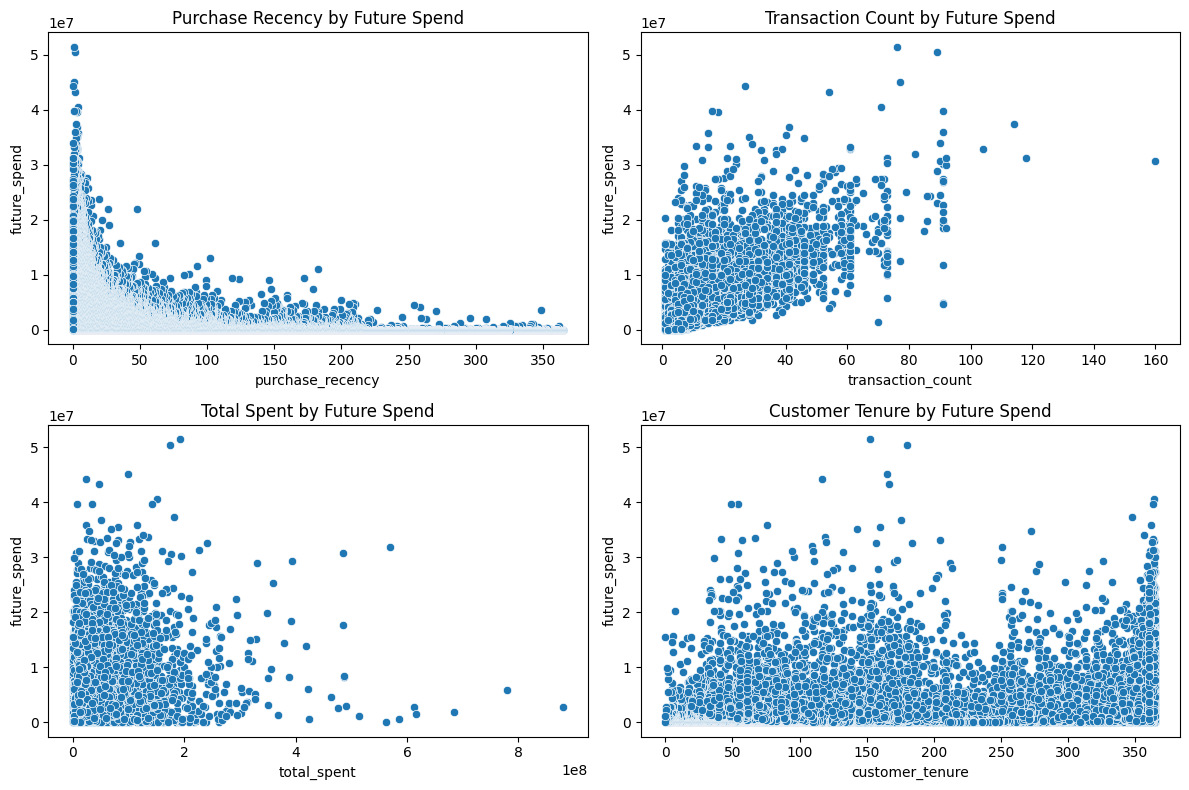

In [10]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.scatterplot(x=df["purchase_recency"], y=df["future_spend"], ax=axes[0, 0])
axes[0, 0].set_title("Purchase Recency by Future Spend")

sns.scatterplot(x=df["transaction_count"], y=df["future_spend"], ax=axes[0, 1])
axes[0, 1].set_title("Transaction Count by Future Spend")

sns.scatterplot(x=df["total_spent"], y=df["future_spend"], ax=axes[1, 0])
axes[1, 0].set_title("Total Spent by Future Spend")

sns.scatterplot(x=df["customer_tenure"], y=df["future_spend"], ax=axes[1, 1])
axes[1, 1].set_title("Customer Tenure by Future Spend")

plt.tight_layout()
plt.show()

__About 25% of customers generated no future revenue for the business__

In [11]:
df.query('future_spend == 0').count()   # 9594 generated us no revenue
df.query('future_spend > 0').count()   # 26492 generated us revenue

customer_id             26492
transaction_count       26492
promo_usage_count       26492
quantity                26492
avg_order_value         26492
first_purchase_date     26492
last_purchase_date      26492
purchase_recency        26492
customer_tenure         26492
payment_method_count    26492
future_spend            26492
total_spent             26492
dtype: int64

In [12]:
df.sample(5)

,customer_id,transaction_count,promo_usage_count,quantity,avg_order_value,first_purchase_date,last_purchase_date,purchase_recency,customer_tenure,payment_method_count,future_spend,total_spent
4912,12107,1,1,1,1.158930e+05,2021-07-19 02:07:00,2021-07-19 02:07:00,165.911639,165.911639,1,242176.0,115893.0
25914,10113,7,5,14,5.477001e+05,2021-01-29 04:09:00,2021-12-17 06:17:00,14.737549,336.826762,3,1313553.0,4381601.0
11817,85850,3,0,10,1.228634e+06,2021-01-06 18:57:00,2021-10-19 23:24:00,73.024405,359.209972,1,738525.0,7371803.0
11952,50540,5,1,6,3.086108e+05,2021-01-01 23:28:00,2021-10-21 03:20:00,71.860989,364.021568,2,947774.0,1851665.0
33877,45090,16,6,25,9.265493e+05,2021-01-17 12:03:00,2021-12-29 01:24:00,2.941552,348.497767,2,4519313.0,21310633.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36086 entries, 0 to 36085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           36086 non-null  int64         
 1   transaction_count     36086 non-null  int64         
 2   promo_usage_count     36086 non-null  int64         
 3   quantity              36086 non-null  int64         
 4   avg_order_value       36086 non-null  float64       
 5   first_purchase_date   36086 non-null  datetime64[ns]
 6   last_purchase_date    36086 non-null  datetime64[ns]
 7   purchase_recency      36086 non-null  float64       
 8   customer_tenure       36086 non-null  float64       
 9   payment_method_count  36086 non-null  int64         
 10  future_spend          36086 non-null  float64       
 11  total_spent           36086 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(5)
memory usage: 3.3 MB


__We can drop the former `recency` and `customer_age` feature__

__We'll convert from Indonesian Rupiah to US dollars for better currency clarity and widely accepted format__

In [14]:
CONVERSION_RATE = 16787.54   # This is the rate as of January 30 2026, can change ofc

df["total_spent"] = (df["total_spent"] / CONVERSION_RATE).round(3)
df["future_spend"] = (df["future_spend"] / CONVERSION_RATE).round(3)
df["avg_order_value"] = (df["avg_order_value"] / CONVERSION_RATE).round(3)


# Core Analysis

__This notebook is going to cover analysis checkboxes, It is not made with consideration to modelling or prediction. It is focused on historical analytics__

__Insights gotten from this analysis serve as a deliverable on its own as to what is actually going on within the data__

In [15]:
df.head()

,customer_id,transaction_count,promo_usage_count,quantity,avg_order_value,first_purchase_date,last_purchase_date,purchase_recency,customer_tenure,payment_method_count,future_spend,total_spent
0,21644,1,1,4,58.543,2021-01-01 01:14:00,2021-01-01 01:14:00,364.948454,364.948454,1,0.0,58.543
1,73192,1,2,2,37.015,2021-01-01 09:21:00,2021-01-01 09:21:00,364.610004,364.610004,1,0.0,74.030
2,9779,1,0,1,4.094,2021-01-01 16:04:00,2021-01-01 16:04:00,364.330234,364.330234,1,0.0,4.094
3,98867,1,0,1,14.923,2021-01-02 01:37:00,2021-01-02 01:37:00,363.932382,363.932382,1,0.0,14.923
4,48935,1,0,2,17.514,2021-01-02 09:29:00,2021-01-02 09:29:00,363.604602,363.604602,1,0.0,35.029


In [16]:
df[["total_spent", "future_spend"]].describe()

,total_spent,future_spend
count,36086.000000,36086.000000
mean,708.793996,135.517851
std,1759.728243,227.197064
min,1.635000,0.000000
25%,33.018000,0.000000
50%,130.647500,42.775000
75%,576.420000,167.486250
max,52428.261000,3069.269000


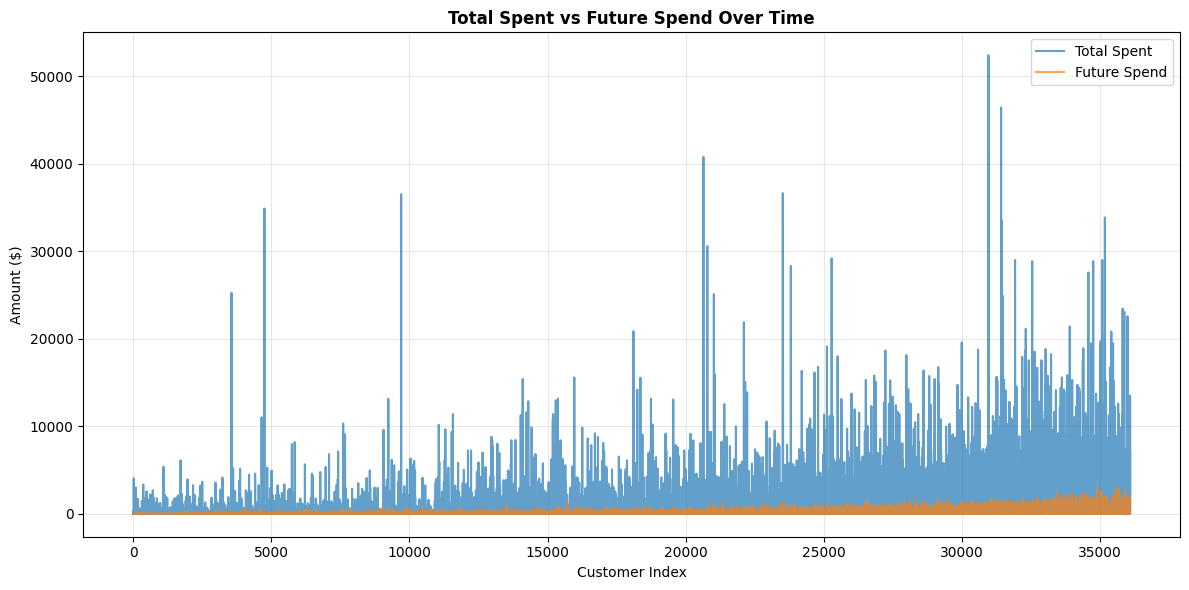

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df["total_spent"], label='Total Spent', alpha=0.7, linewidth=1.5)
ax.plot(df.index, df["future_spend"], label='Future Spend', alpha=0.7, linewidth=1.5)

ax.set_title('Total Spent vs Future Spend Over Time', fontsize=12, fontweight='bold')
ax.set_xlabel('Customer Index')
ax.set_ylabel('Amount ($)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
df.to_parquet("../data/processed/cleaned_clv_data.parquet", index=False)